<a href="https://colab.research.google.com/github/atulesh27/data-science/blob/main/Bank_churn_dataset_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About this file
RowNumber—corresponds to the record (row) number and has no effect on the output.
CustomerId—contains random values and has no effect on customer leaving the bank.
Surname—the surname of a customer has no impact on their decision to leave the bank.
CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
Geography—a customer’s location can affect their decision to leave the bank.
Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
NumOfProducts—refers to the number of products that a customer has purchased through the bank.
HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
IsActiveMember—active customers are less likely to leave the bank.
EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
Exited—whether or not the customer left the bank.

dataset link : https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
df = pd.read_csv('/content/churn.csv')

**check how data looks like**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**check shape of data**

In [ ]:
df.shape

(10000, 14)

**checking information about data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We have 14 variables and 10000 observations in the dataset, also;

We have 3 String variables. (Surname, Geography, Gender)

We have 11 numerical variables. (RowNumber, CustomerId, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited)

**drop unwanted features**

In [ ]:
df.drop(["RowNumber","CustomerId","Surname"], axis = 1 , inplace = True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
#describe

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#checking duplicate values:

df.duplicated().sum()

0

In [ ]:
# checking null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**spliting data into X and y variable **

In [ ]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


**replace 0 value with nan value**

In [ ]:
# Replace 0 with NaN in all columns

X.replace(0, np.nan, inplace=True)

In [ ]:
#missing data note :

X.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure              413
Balance            3617
NumOfProducts         0
HasCrCard          2945
IsActiveMember     4849
EstimatedSalary       0
dtype: int64

In [ ]:
# checking null value in percentage

X.isnull().sum()/X.shape[0]*100

CreditScore         0.00
Geography           0.00
Gender              0.00
Age                 0.00
Tenure              4.13
Balance            36.17
NumOfProducts       0.00
HasCrCard          29.45
IsActiveMember     48.49
EstimatedSalary     0.00
dtype: float64

from above observation we can see
Tenure,Balance,HasCrCard,IsActiveMember is having null value


**checking value in exited feature using pieplot**

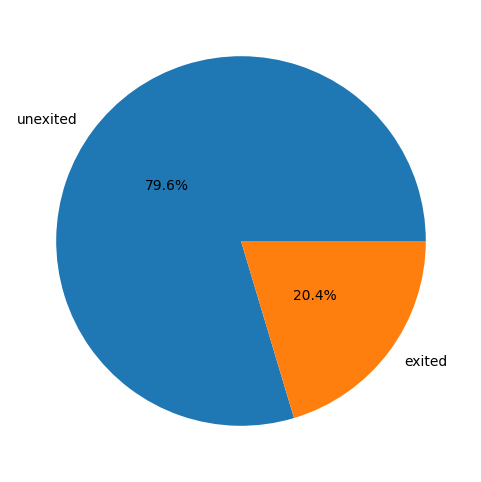

In [ ]:
data = y.value_counts().values
plt.figure(figsize=(7, 6))
plt.pie(data,labels=['unexited', 'exited'], autopct='%1.1f%%', pctdistance=0.5)
plt.show()

**checking median **

In [ ]:
X.median()

<ipython-input-204-00f58c03ea6d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.median()


CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance            119839.690
NumOfProducts           1.000
HasCrCard               1.000
IsActiveMember          1.000
EstimatedSalary    100193.915
dtype: float64

In [ ]:
# replace nan value with median:

X['Balance'] = X['Balance'].fillna(X['Balance'].median())

X['HasCrCard'] = X['HasCrCard'].fillna(X['HasCrCard'].median())

X['IsActiveMember'] = X['IsActiveMember'].fillna(X['IsActiveMember'].median())

X['Tenure'] = X['Tenure'].fillna(X['Tenure'].median())


in above all the null value will get replace by median

In [ ]:
#again checking if null value is present in percentage
X.isnull().sum()/X.shape[0]*100

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
dtype: float64

In [ ]:
#Data visualization

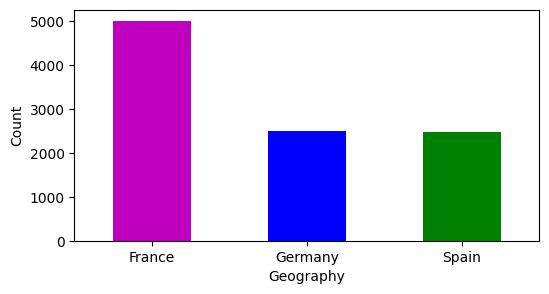

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:

plt.figure(figsize = (6, 3))
X['Geography'].value_counts().plot.bar(color = ['m','b','g'])
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

df['Geography'].value_counts()

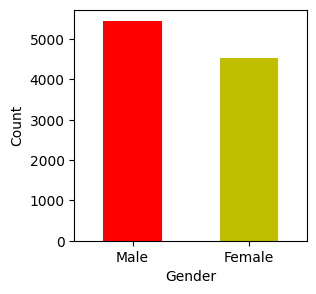

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
#Bar plot for gender:

plt.figure(figsize= (3,3))
X['Gender'].value_counts().plot.bar(color= ['r', 'y'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

df['Gender'].value_counts()

**checking pairplot**

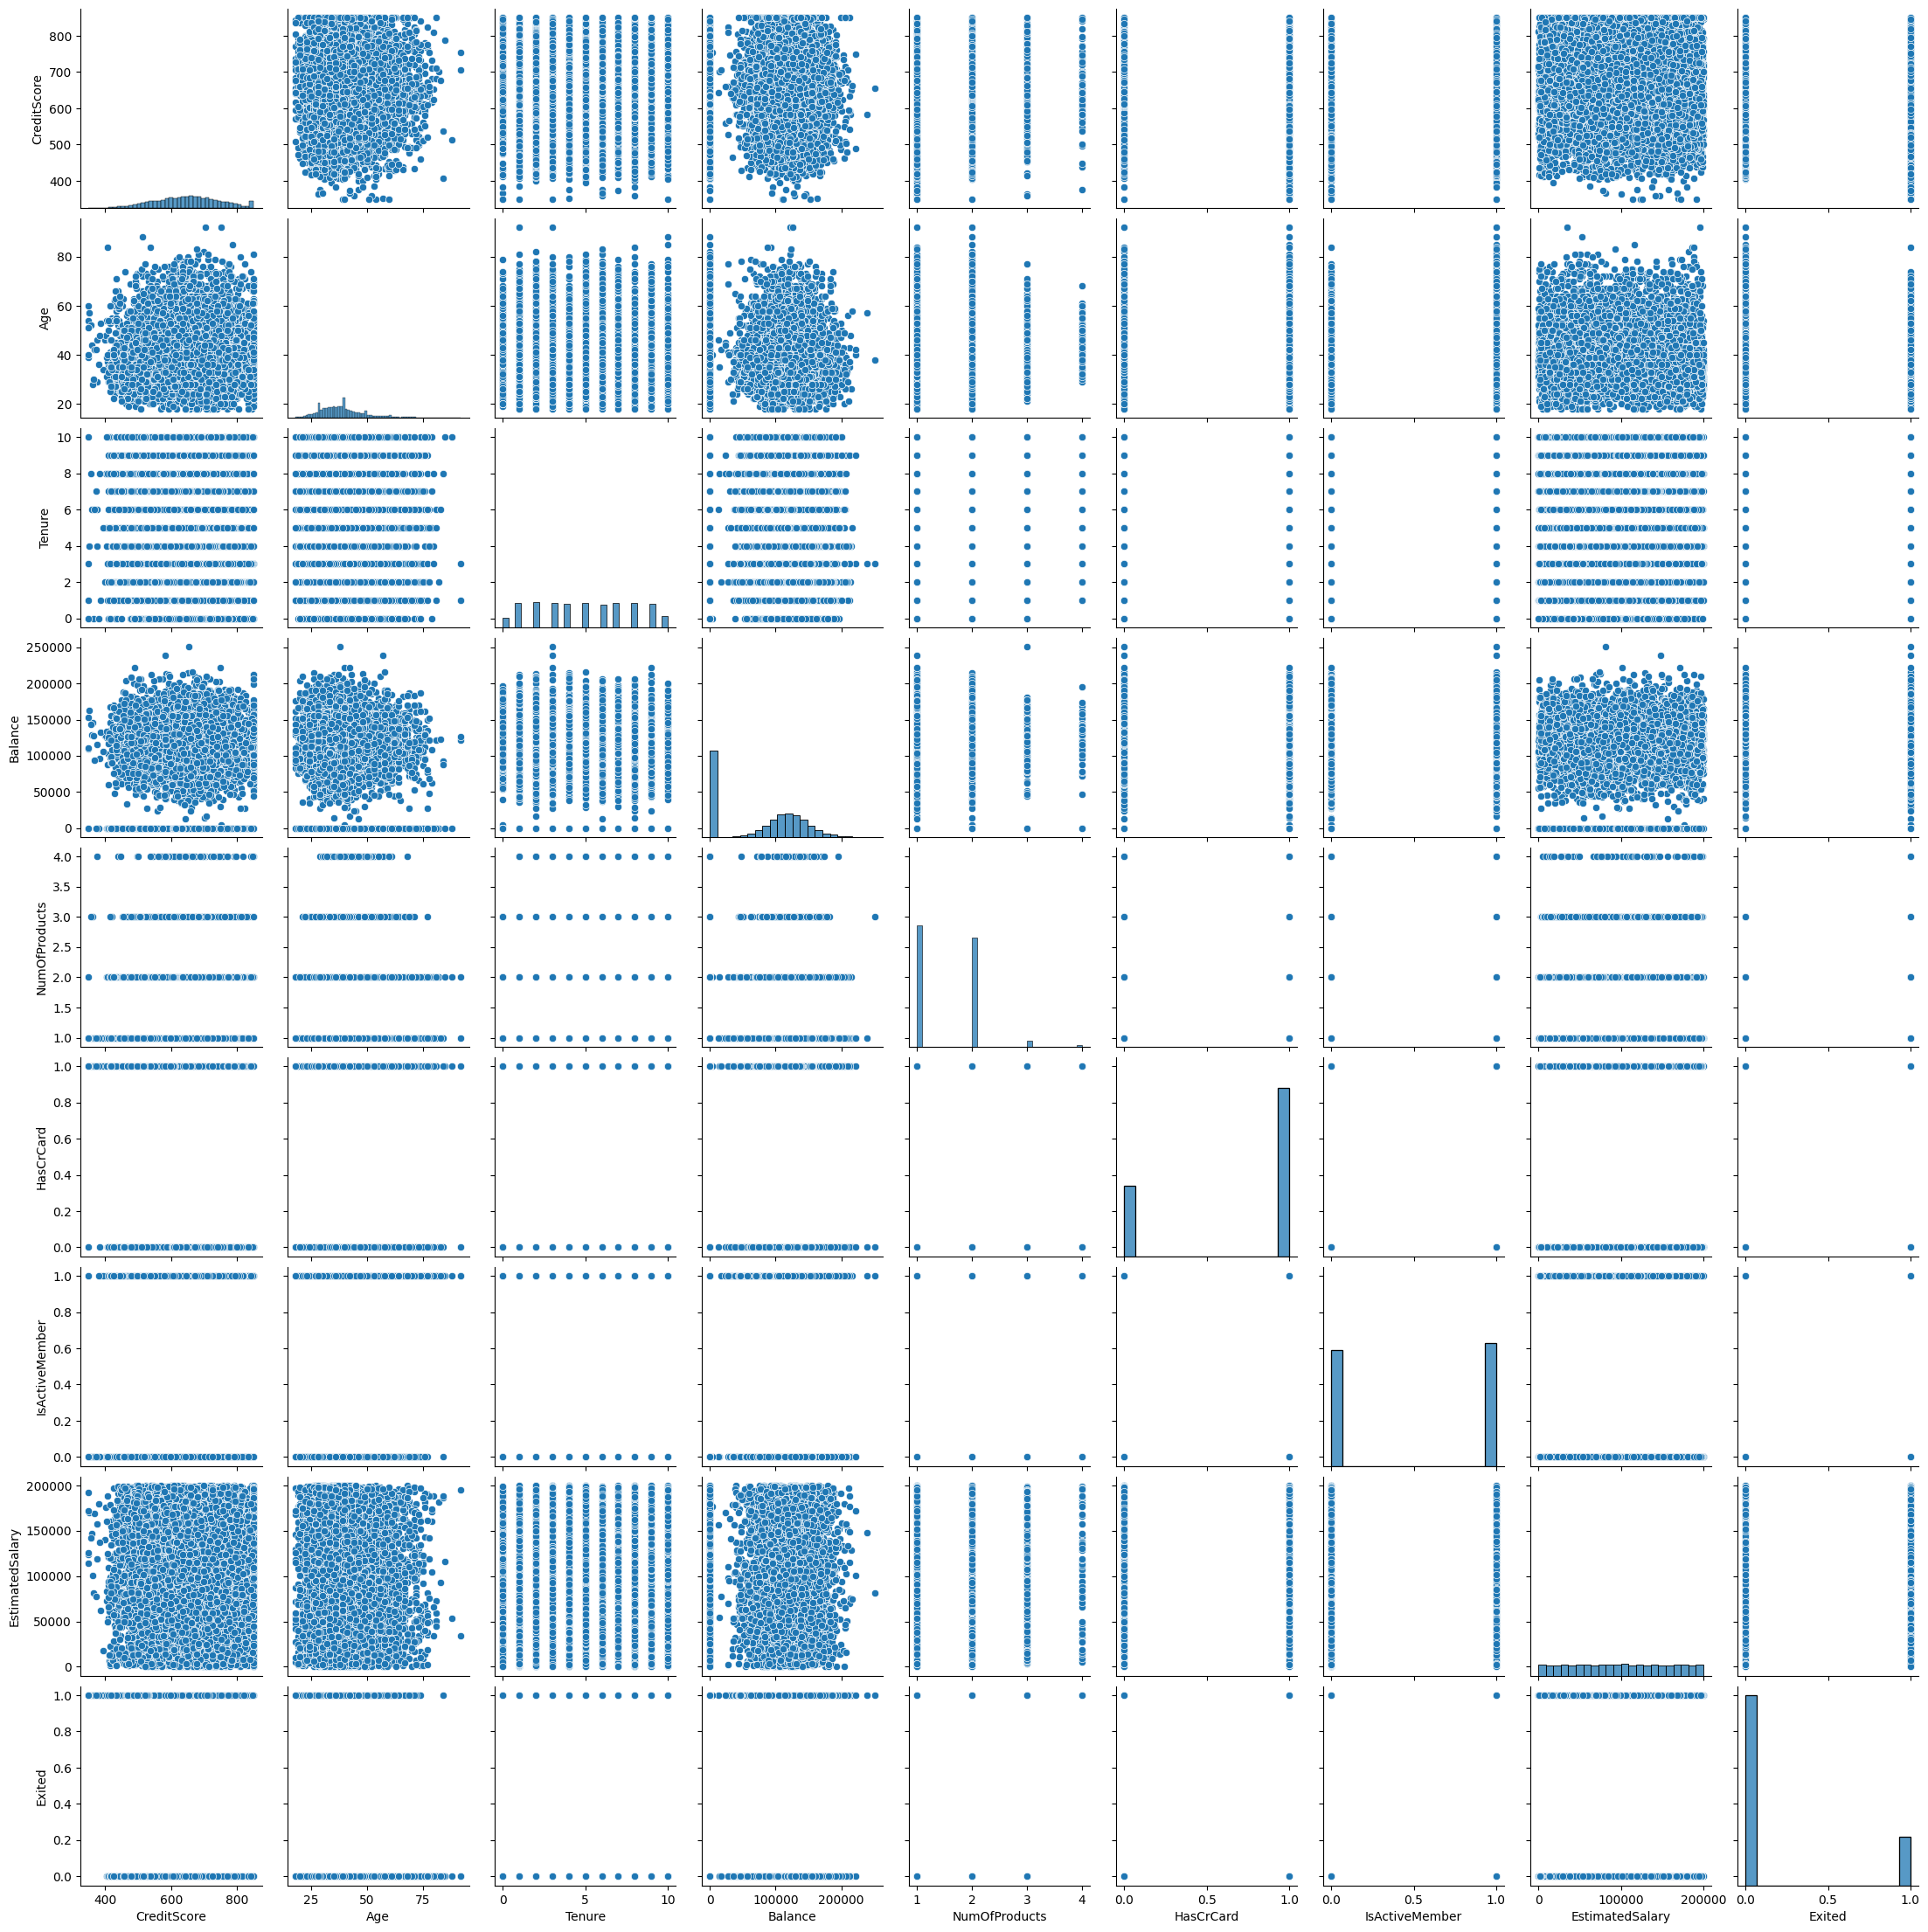

In [ ]:
sns.pairplot(df)

<ipython-input-211-5e520616d1af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(),annot=True)


<Axes: >

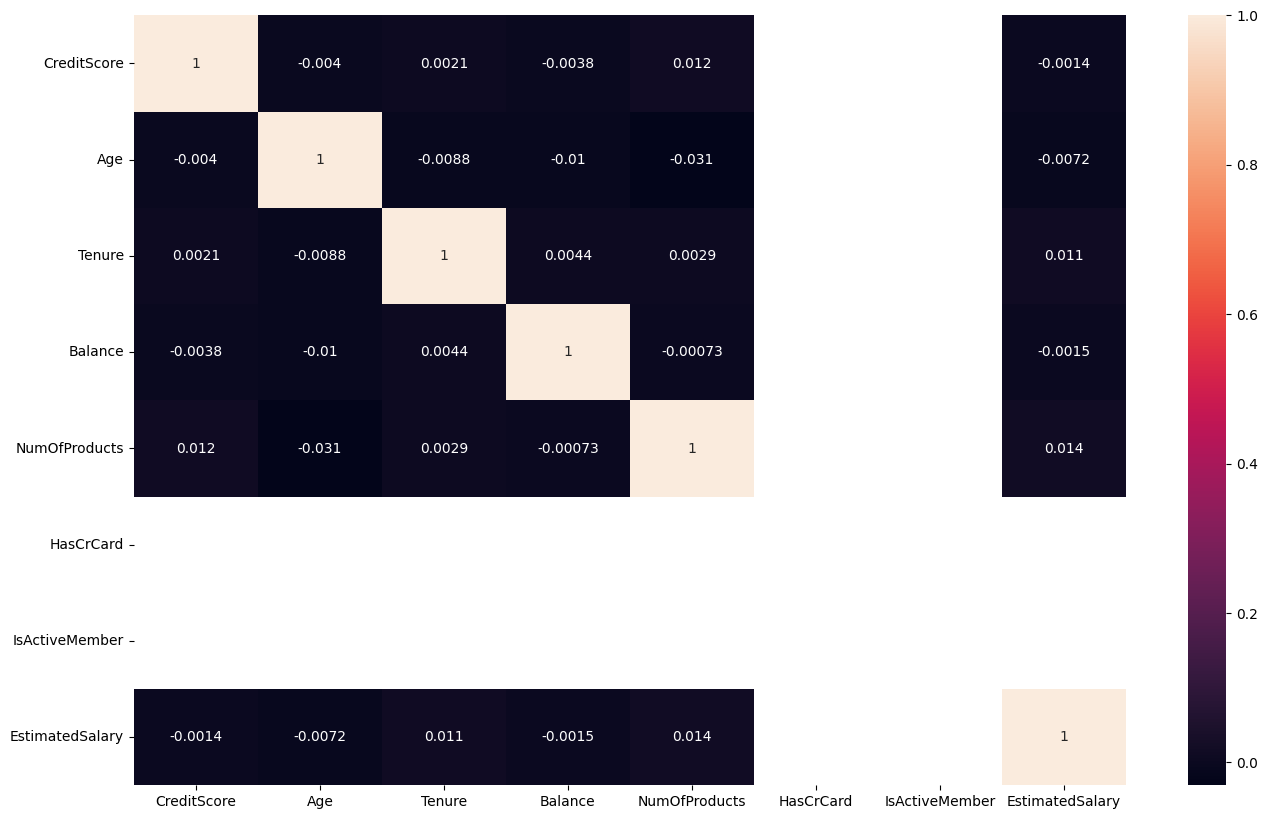

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(),annot=True)

**droping feature **

In [ ]:
X.drop(['HasCrCard', 'IsActiveMember'], axis = 1 , inplace = True)

<ipython-input-213-5e520616d1af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(),annot=True)


<Axes: >

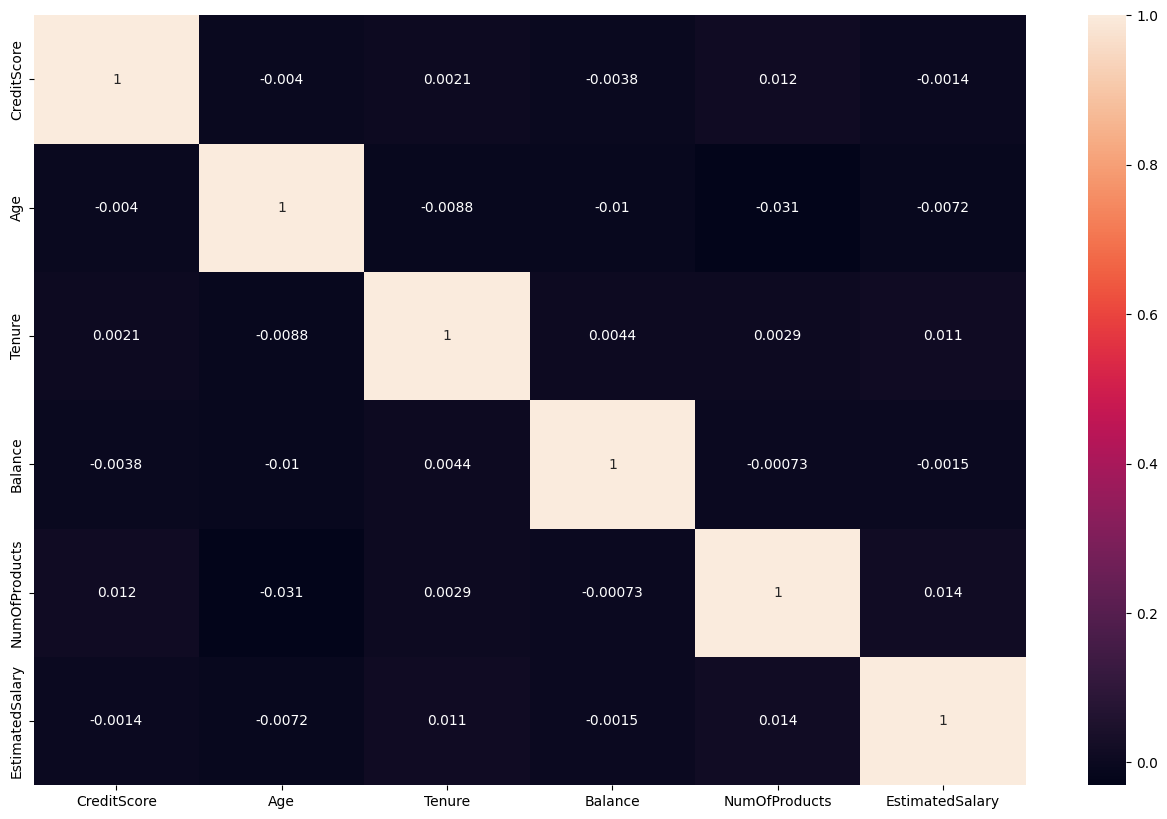

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(),annot=True)

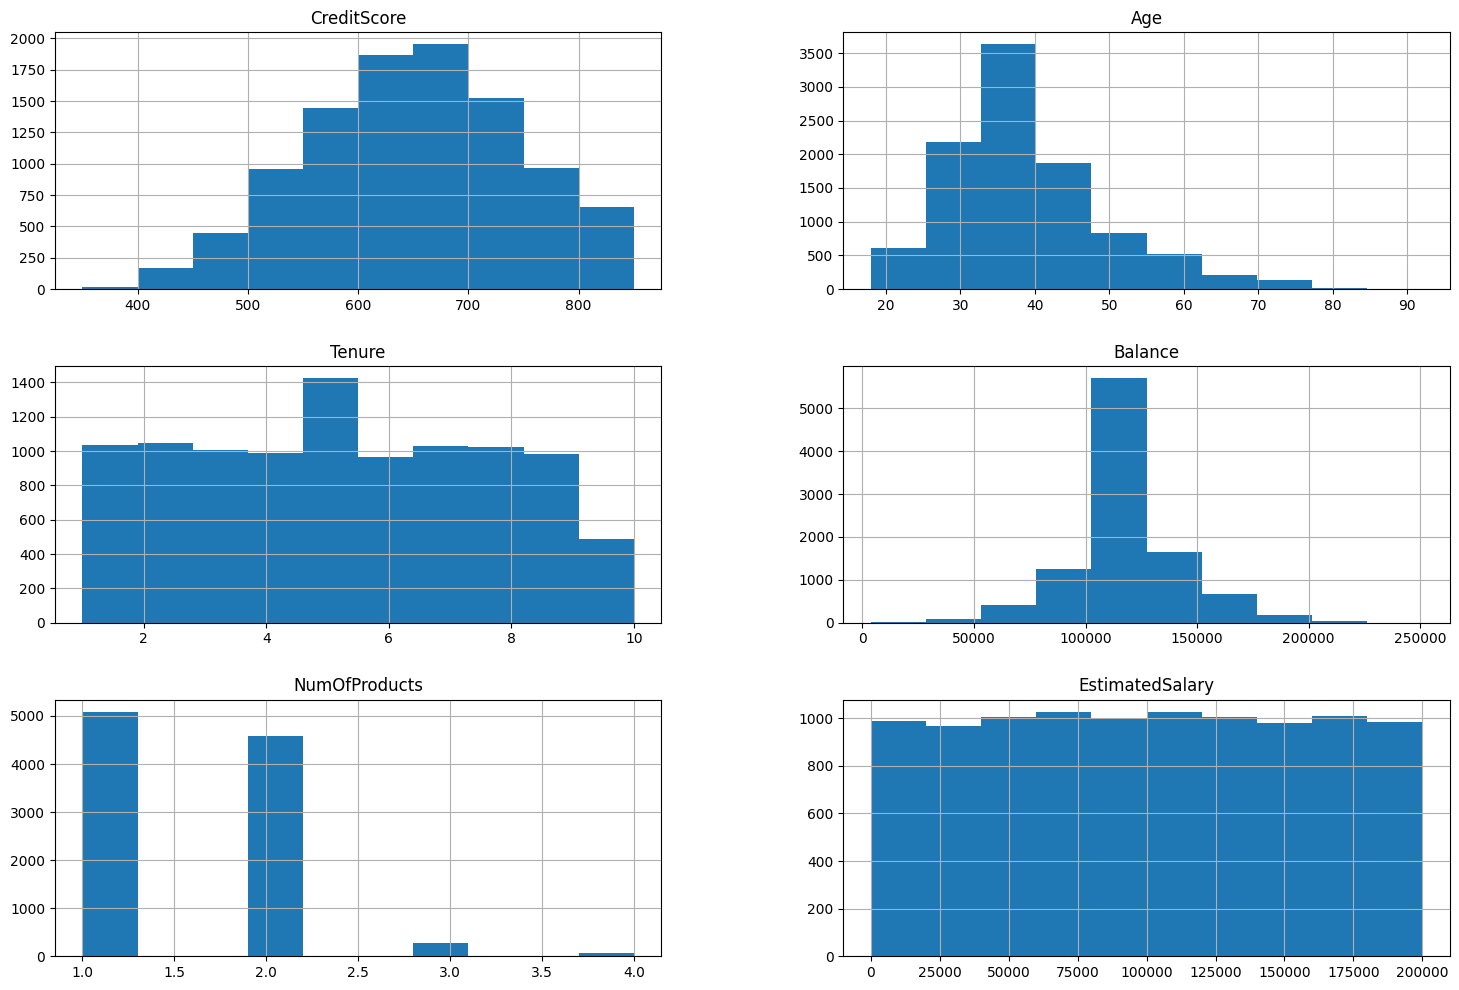

In [ ]:
#histogram on dataframe

X.hist(figsize=(18,12))
plt.show()

**Feature Encoding**

In [ ]:
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the 'Geography' and 'Gender' columns
encoded_data = encoder.fit_transform(X[['Geography', 'Gender']])

# Convert the float code to int code
int_encoded_data = encoded_data.astype(int)

# Create a new DataFrame with the int encoded data
df2 = pd.DataFrame(int_encoded_data, columns=encoder.get_feature_names_out(['Geography', 'Gender']))

# Output the resulting DataFrame
print(df2)

      Geography_Germany  Geography_Spain  Gender_Male
0                     0                0            0
1                     0                1            0
2                     0                0            0
3                     0                0            0
4                     0                1            0
...                 ...              ...          ...
9995                  0                0            1
9996                  0                0            1
9997                  0                0            0
9998                  1                0            1
9999                  0                0            0

[10000 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X = pd.concat([X,df2],axis=1)

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2.0,119839.69,1,101348.88,0,0,0
1,608,Spain,Female,41,1.0,83807.86,1,112542.58,0,1,0
2,502,France,Female,42,8.0,159660.80,3,113931.57,0,0,0
3,699,France,Female,39,1.0,119839.69,2,93826.63,0,0,0
4,850,Spain,Female,43,2.0,125510.82,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,119839.69,2,96270.64,0,0,1
9996,516,France,Male,35,10.0,57369.61,1,101699.77,0,0,1
9997,709,France,Female,36,7.0,119839.69,1,42085.58,0,0,0
9998,772,Germany,Male,42,3.0,75075.31,2,92888.52,1,0,1


In [ ]:
#drop categorical feature

X.drop(columns=['Geography','Gender'],inplace=True)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,119839.69,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,113931.57,0,0,0
3,699,39,1.0,119839.69,2,93826.63,0,0,0
4,850,43,2.0,125510.82,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,119839.69,2,96270.64,0,0,1
9996,516,35,10.0,57369.61,1,101699.77,0,0,1
9997,709,36,7.0,119839.69,1,42085.58,0,0,0
9998,772,42,3.0,75075.31,2,92888.52,1,0,1


find outlier using boxplot in python

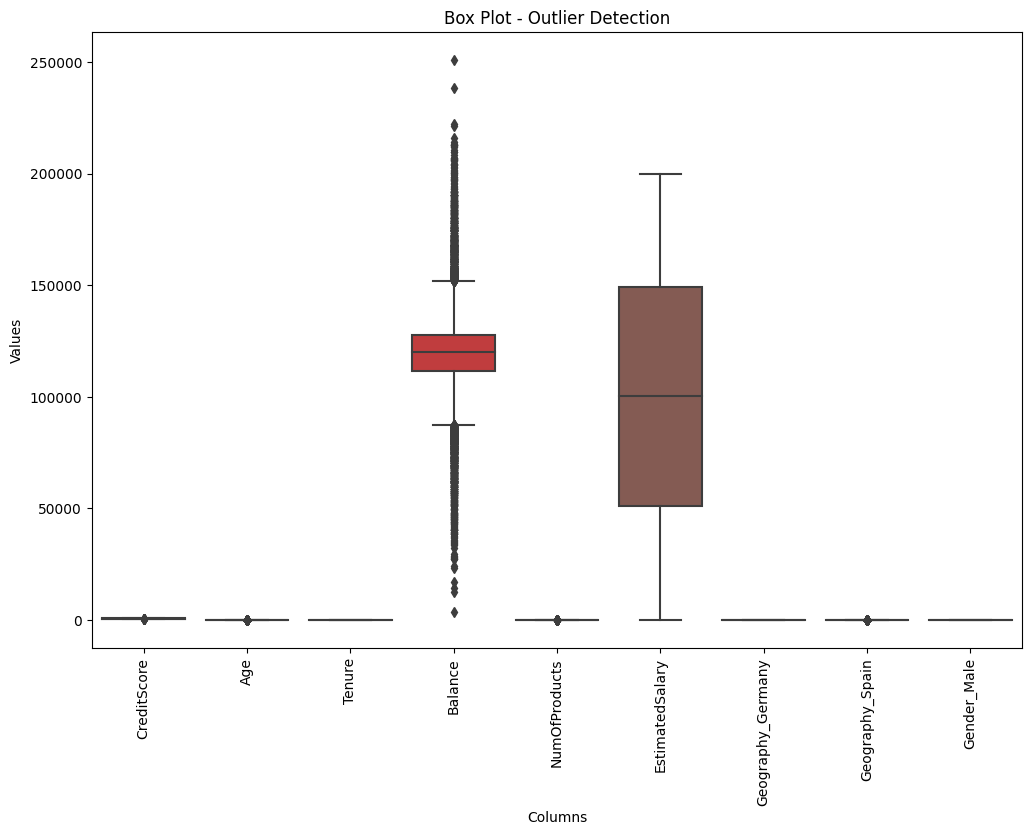

In [ ]:
# Assuming your data is in a pandas DataFrame named 'X' with multiple columns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot for all columns
sns.boxplot(data=X)

# Set the title of the plot
plt.title('Box Plot - Outlier Detection')

# Set the x-axis label
plt.xlabel('Columns')

# Set the y-axis label
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


**Removing outliers **

In [ ]:
#CreditScore
X['CreditScore'] = X['CreditScore'].clip(lower=X['CreditScore'].quantile(0.25),
                                        upper=X['CreditScore'].quantile(0.75))

#AGE
X['Age'] = X['Age'].clip(lower=X['Age'].quantile(0.25),
                        upper=X['Age'].quantile(0.75))


#Balance

X['Balance'] = X['Balance'].clip(lower=X['Balance'].quantile(0.25),
                                upper=X['Balance'].quantile(0.75))


#NumOfProducts

X['NumOfProducts'] = X['NumOfProducts'].clip(lower=X['NumOfProducts'].quantile(0.25),
                                            upper=X['NumOfProducts'].quantile(0.75))


#Geography_Spain

X['Geography_Spain'] = X['Geography_Spain'].clip(lower=X['Geography_Spain'].quantile(0.25),
                                          upper=X['Geography_Spain'].quantile(0.75))

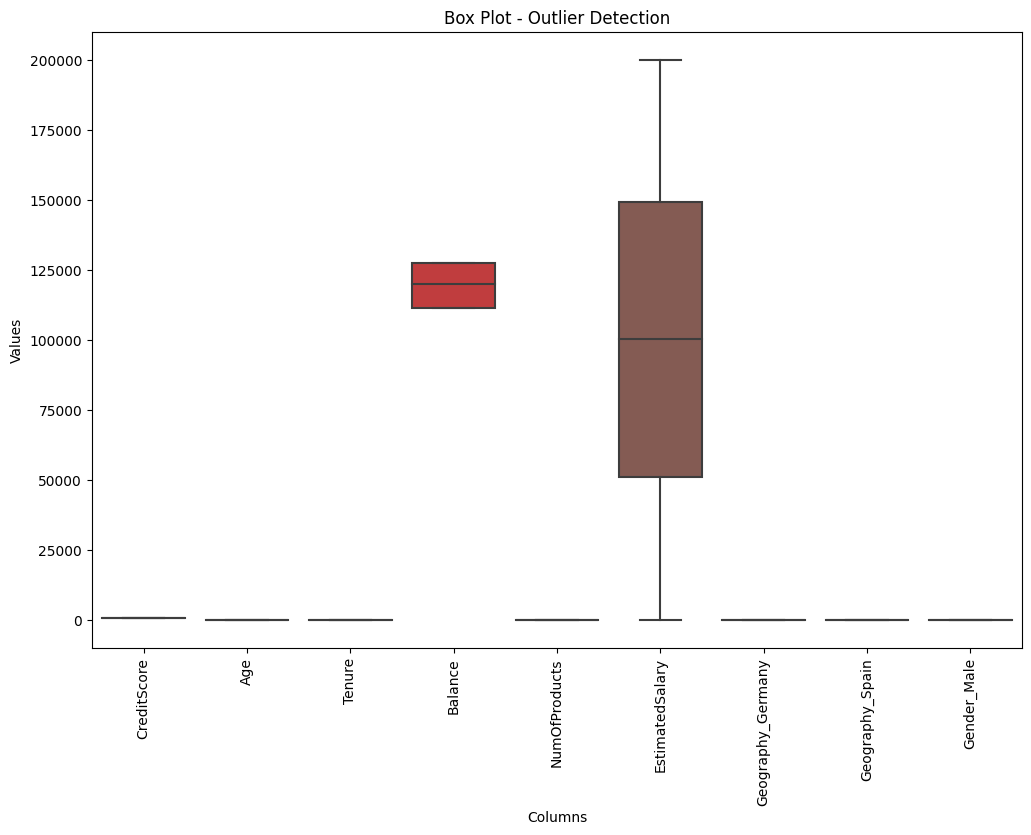

In [ ]:
# Assuming your data is in a pandas DataFrame named 'X' with multiple columns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot for all columns
sns.boxplot(data=X)

# Set the title of the plot
plt.title('Box Plot - Outlier Detection')

# Set the x-axis label
plt.xlabel('Columns')

# Set the y-axis label
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


**Now handling imbalance dataset**

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,119839.6900,1,101348.88,0,0,0
1,608,41,1.0,111581.1275,1,112542.58,0,0,0
2,584,42,8.0,127644.2400,2,113931.57,0,0,0
3,699,39,1.0,119839.6900,2,93826.63,0,0,0
4,718,43,2.0,125510.8200,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,718,39,5.0,119839.6900,2,96270.64,0,0,1
9996,584,35,10.0,111581.1275,1,101699.77,0,0,1
9997,709,36,7.0,119839.6900,1,42085.58,0,0,0
9998,718,42,3.0,111581.1275,2,92888.52,1,0,1


**handle imbalance data set with smote**

In [ ]:
X_res , y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

**spliting dataset into training and test dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

**feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**model evaluation**

**DECISION TREE **

**Build model On post prunning**

In [ ]:
Entro_Model = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
Entro_Model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred = Entro_Model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7495291902071564

In [ ]:
precision_score(y_test,y_pred)

0.7105409927495817

In [ ]:
recall_score(y_test,y_pred)

0.8203477141017386

In [ ]:
plt.figure(figsize =(60,40))

<Figure size 6000x4000 with 0 Axes>

<Figure size 6000x4000 with 0 Axes>

[Text(0.5, 0.875, 'x[4] <= 0.345\nentropy = 1.0\nsamples = 12740\nvalue = [6330, 6410]'),
 Text(0.25, 0.625, 'x[1] <= -0.494\nentropy = 0.932\nsamples = 8449\nvalue = [2939, 5510]'),
 Text(0.125, 0.375, 'x[8] <= 0.178\nentropy = 0.963\nsamples = 2505\nvalue = [1534, 971]'),
 Text(0.0625, 0.125, 'entropy = 0.997\nsamples = 1339\nvalue = [628, 711]'),
 Text(0.1875, 0.125, 'entropy = 0.766\nsamples = 1166\nvalue = [906, 260]'),
 Text(0.375, 0.375, 'x[8] <= 0.178\nentropy = 0.789\nsamples = 5944\nvalue = [1405, 4539]'),
 Text(0.3125, 0.125, 'entropy = 0.601\nsamples = 4044\nvalue = [592, 3452]'),
 Text(0.4375, 0.125, 'entropy = 0.985\nsamples = 1900\nvalue = [813, 1087]'),
 Text(0.75, 0.625, 'x[1] <= -0.063\nentropy = 0.741\nsamples = 4291\nvalue = [3391, 900]'),
 Text(0.625, 0.375, 'x[8] <= 0.178\nentropy = 0.45\nsamples = 2394\nvalue = [2169, 225]'),
 Text(0.5625, 0.125, 'entropy = 0.61\nsamples = 1094\nvalue = [930, 164]'),
 Text(0.6875, 0.125, 'entropy = 0.273\nsamples = 1300\nvalue = 

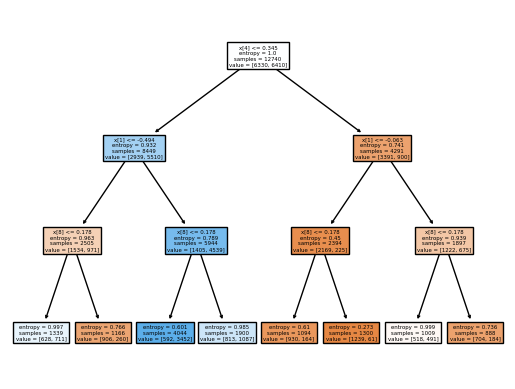

In [ ]:
from sklearn import tree
tree.plot_tree(Entro_Model,filled = True)

**Preprunning **

In [ ]:
## Preprunning

parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

**GridSearchCV is a technique used to find the best combination of hyperparameters for a machine learning model by exhaustively searching through a specified parameter space and evaluating each combination using cross-validation. It automates the process of hyperparameter tuning and improves the model's performance.**

In [ ]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [ ]:
cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

it will give us best parameter

In [ ]:
y_pred1=cv.predict(X_test)

In [ ]:
Dt_score=accuracy_score(y_pred1,y_test)

In [ ]:
Dt_score

0.7595731324544884

**Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test)

In [ ]:
Rt_Score = accuracy_score(y_test,y_pred2)

In [ ]:
Rt_Score

0.8025737602008789

In [ ]:
precision_score(y_test,y_pred2)

0.7652123995407577

In [ ]:
recall_score(y_test,y_pred2)

0.8583386992916935

In [ ]:
final_data = pd.DataFrame({'Models':['DT','RF'],'Accuracy':[accuracy_score(y_test,y_pred1),
                                                                 accuracy_score(y_test,y_pred2)]})

In [ ]:
final_data

,Models,Accuracy
0,DT,0.759573
1,RF,0.802574


**from above data we can say Random forest classifier has good accuracy then Decision tree models**